In [3]:
from google.colab import files

#memasukkan data
filedata = files.upload()

In [4]:
import pandas as pd

#membaca dataset dan mengubanya menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

#menampilkan data (3)index jumlah yang ditampilkan
df.head(5)

FileNotFoundError: ignored

In [ ]:
#mengubah nama kolom/atribut 
df = df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score'})

#mengubah data menjadi numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
#import KMeans dari sklearn
from sklearn.cluster import KMeans

#menghilangkan data tidak penting(ID dan gender)
X = df.drop(['CustomerID', 'gender', 'age'], axis=1)

#membuat list yang berisi inertia
clusters=[]
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

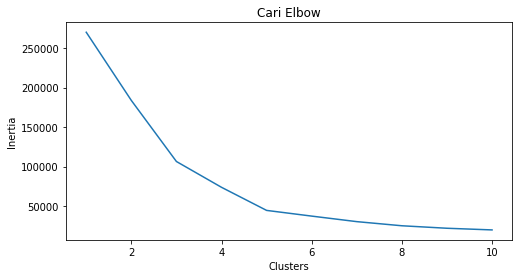

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig,ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


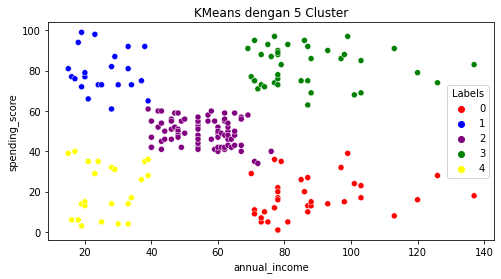

In [ ]:
import matplotlib.pyplot as plt

# membuat objek KMeans
nums = 5
km5 = KMeans(n_clusters=nums).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_


# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
colors= ['red', 'blue', 'purple', 'green', 'yellow']
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], palette=colors )

plt.title('KMeans dengan 5 Cluster')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


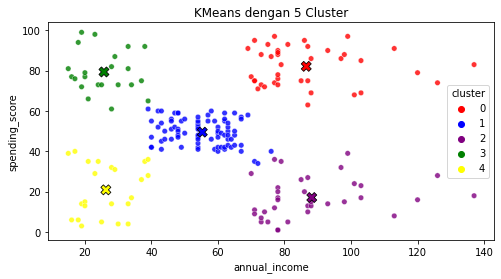

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

#membaca dataset dan mengubanya menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

#mengubah nama kolom/atribut 
df = df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score'})
X = df.drop(['CustomerID', 'gender', 'age'], axis=1)

y = X['annual_income']
n = X['spending_score']
d = list(y)
c = list(n)
N = np.vstack([d,c]).T
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters).fit(N)

colors = ['red', 'blue', 'purple', 'green', 'yellow']
plt.figure(figsize=(8,4))
ax = sns.scatterplot(N[:, 0], N[:, 1], hue=kmeans.labels_, palette=colors, alpha=0.8, s=30)
ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                     hue=range(num_clusters), palette=colors, marker='X', s=100, ec='black', legend=False, ax=ax)
plt.title('KMeans dengan 5 Cluster')
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.legend(title='cluster')
plt.show()


In [ ]:
import numpy as np

D=500
X0 = np.random.normal(np.repeat(np.random.uniform(0, 20, 4), D), 1)
X1 = np.random.normal(np.repeat(np.random.uniform(0, 10, 4), D), 1)
X = np.vstack([X0,X1]).T
print(X)

[[ 7.96857344  6.6604673 ]
 [11.31103732  6.52839509]
 [ 9.64169833  7.91050816]
 ...
 [ 5.77146166  7.13707843]
 [ 6.43544014  9.88251726]
 [ 7.72000003  8.87070464]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


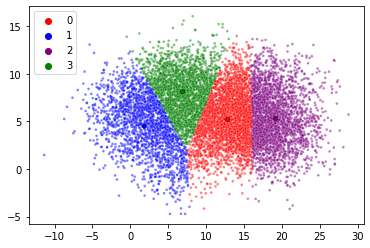

[ 7.2551195   2.7144628  -0.43984753 ... 14.01302344 14.55325883
 12.93884985]


In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

N = 500
X0 = np.random.normal(np.repeat(np.random.uniform(0, 20, 20), N), 3)
X1 = np.random.normal(np.repeat(np.random.uniform(0, 10, 20), N), 2)
X = np.vstack([X0, X1]).T
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters).fit(X)

colors = ['red', 'blue', 'purple', 'green']
ax = sns.scatterplot(X[:, 0], X[:, 1], hue=kmeans.labels_, palette=colors, alpha=0.5, s=7)
ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                     hue=range(num_clusters), palette=colors, s=20, ec='black', legend=False, ax=ax)
plt.show()

print(X0)

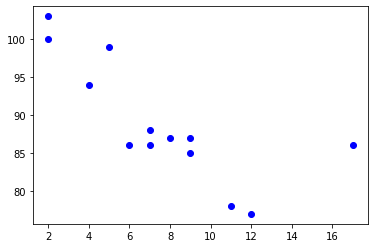

In [ ]:
import matplotlib.pyplot as plt
  
  
x =[5, 7, 8, 7, 2, 17, 2, 9,
    4, 11, 12, 9, 6] 
  
y =[99, 86, 87, 88, 100, 86, 
    103, 87, 94, 78, 77, 85, 86]
  
plt.scatter(x, y, c ="blue")
  
# To show the plot
plt.show()